In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

### Read the input file and check the data dimension

In [2]:
gc_df = pd.read_csv('german_credit.csv')
print(f'Rows: {gc_df.shape[0]}, Columns: {gc_df.shape[1]}')
gc_df.info()

Rows: 1000, Columns: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job       

In [3]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable
gc_df.sample(10)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
936,1,>= 200 DM / salary assignments for at least 1 ...,9,existing credits paid back duly till now,domestic appliances,745,... < 100 DM,1 <= ... < 4 years,3,female : divorced/separated/married,...,2,real estate,28,none,own,1,unskilled - resident,1,none,yes
431,1,0 <= ... < 200 DM,24,existing credits paid back duly till now,furniture/equipment,11328,... < 100 DM,1 <= ... < 4 years,2,male : single,...,3,"if not A121/A122 : car or other, not in attrib...",29,bank,own,2,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
640,1,< 0 DM,18,existing credits paid back duly till now,(vacation - does not exist?),750,... < 100 DM,unemployed,4,female : divorced/separated/married,...,1,real estate,27,none,own,1,unemployed/ unskilled - non-resident,1,none,yes
204,0,no checking account,12,critical account/ other credits existing (not ...,car (new),1495,... < 100 DM,.. >= 7 years,4,male : single,...,1,real estate,38,none,own,2,unskilled - resident,2,none,yes
60,0,0 <= ... < 200 DM,9,existing credits paid back duly till now,business,1391,... < 100 DM,1 <= ... < 4 years,2,male : married/widowed,...,1,real estate,27,bank,own,1,skilled employee / official,1,"yes, registered under the customers name",yes
715,0,no checking account,30,critical account/ other credits existing (not ...,car (used),7596,unknown/ no savings account,.. >= 7 years,1,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",63,none,own,2,skilled employee / official,1,none,yes
955,0,< 0 DM,24,critical account/ other credits existing (not ...,domestic appliances,1231,.. >= 1000 DM,.. >= 7 years,4,female : divorced/separated/married,...,4,if not A121 : building society savings agreeme...,57,none,rent,2,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
180,1,no checking account,36,delay in paying off in the past,business,9572,... < 100 DM,... < 1 year,1,male : divorced/separated,...,1,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,skilled employee / official,1,none,yes
515,0,< 0 DM,6,critical account/ other credits existing (not ...,car (new),609,... < 100 DM,4 <= ... < 7 years,4,female : divorced/separated/married,...,3,if not A121 : building society savings agreeme...,37,none,own,2,skilled employee / official,1,none,no
540,1,0 <= ... < 200 DM,12,existing credits paid back duly till now,domestic appliances,1534,... < 100 DM,... < 1 year,1,male : married/widowed,...,1,real estate,23,none,rent,1,skilled employee / official,1,none,yes


1. Dataset has 21 columns / Features of which Default is the target and hence 20 independent features to predict from.
2. Out of 20, 7 are numerical and 13 are object type. The 13 objects may be either categorical or text.

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

_Before splitting the data, seperating the data into independent features(X) and target(y)_

In [4]:
X = gc_df.drop(labels='default', axis=1)
y = gc_df[['default']]

In [5]:
from sklearn.model_selection import train_test_split
X, X_ignore, y, y_ignore = train_test_split(X, y, test_size=0.5, random_state=7)
print(f'X_Rows: {X.shape[0]}, X_Columns: {X.shape[1]}')
print(f'Y_Rows: {y.shape[0]}, y_Columns: {y.shape[1]}')

X_Rows: 500, X_Columns: 20
Y_Rows: 500, y_Columns: 1


# Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [6]:
# Checking for Null values
X.isna().sum()

account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [7]:
# Checking if the Columns with object types are really categorical or text using the number of unique values in each column.
counts = []
for col in X.columns:
    if X[col].dtype == 'object':
        counts.append([col, X[col].nunique()])
col_uniques = pd.DataFrame(counts, columns=['Column_Name', 'Unique_Values'])
col_uniques.sort_values('Unique_Values', ascending=True)

,Column_Name,Unique_Values
11,telephone,2
12,foreign_worker,2
6,other_debtors,3
8,other_installment_plans,3
9,housing,3
0,account_check_status,4
5,personal_status_sex,4
7,property,4
10,job,4
1,credit_history,5


_The categorical columns have more than 2 unique values, so using get_dummies would increase the columns as it splits unique values as different columns_

In [8]:
X = pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 262 to 175
Data columns (total 61 columns):
duration_in_month                                                             500 non-null int64
credit_amount                                                                 500 non-null int64
installment_as_income_perc                                                    500 non-null int64
present_res_since                                                             500 non-null int64
age                                                                           500 non-null int64
credits_this_bank                                                             500 non-null int64
people_under_maintenance                                                      500 non-null int64
account_check_status_0 <= ... < 200 DM                                        500 non-null uint8
account_check_status_< 0 DM                                                   500 non-null uint8
account_check_status

In [9]:
# Print Shape of model data
print(f'Shape of model\nRows: {X.shape[0]}, Columns: {X.shape[1]}')

Shape of model
Rows: 500, Columns: 61


### Check for highly correlated variables but don't required any treatment for this use case

In [10]:
corr_matrix = X.corr()
corr_matrix

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
duration_in_month,1.000000,0.669686,0.061521,0.016471,-0.016886,-0.034892,-0.052569,0.114018,-0.020352,-0.069055,...,-7.916794e-02,-0.066980,0.107500,0.052840,-0.006085,-1.557128e-01,-0.148593,0.148593,-0.122827,0.122827
credit_amount,0.669686,1.000000,-0.254486,-0.024982,0.047257,-0.008663,-0.008651,0.143620,-0.056465,-0.098673,...,-1.172121e-01,-0.045493,0.334242,-0.107587,-0.051660,-1.429619e-01,-0.286036,0.286036,-0.004987,0.004987
installment_as_income_perc,0.061521,-0.254486,1.000000,0.046631,0.005176,0.013426,-0.066527,-0.067434,0.066033,-0.012067,...,2.418437e-02,-0.045652,0.024764,0.047316,-0.043179,-6.166971e-02,0.027533,-0.027533,-0.099614,0.099614
present_res_since,0.016471,-0.024982,0.046631,1.000000,0.298441,0.083938,0.062531,-0.120421,0.099763,-0.016563,...,-2.549124e-01,0.093396,0.056670,-0.068720,-0.033805,4.665443e-02,-0.147116,0.147116,-0.025856,0.025856
age,-0.016886,0.047257,0.005176,0.298441,1.000000,0.144156,0.116705,-0.088513,-0.003051,0.053409,...,2.890115e-03,-0.232857,0.193506,-0.220548,0.092830,5.942677e-02,-0.151331,0.151331,0.009335,-0.009335
credits_this_bank,-0.034892,-0.008663,0.013426,0.083938,0.144156,1.000000,0.090760,-0.134189,-0.008866,-0.101759,...,4.154080e-02,-0.097184,0.018928,0.008244,0.063727,-5.191741e-02,-0.041090,0.041090,-0.024385,0.024385
people_under_maintenance,-0.052569,-0.008651,-0.066527,0.062531,0.116705,0.090760,1.000000,-0.106872,0.076662,-0.028040,...,-2.904670e-02,-0.077498,0.011526,-0.105317,-0.040484,1.331087e-01,-0.005313,0.005313,0.099226,-0.099226
account_check_status_0 <= ... < 200 DM,0.114018,0.143620,-0.067434,-0.120421,-0.088513,-0.134189,-0.106872,1.000000,-0.373070,-0.150809,...,-1.600051e-02,0.017125,0.059625,-0.044042,0.019352,-6.874084e-03,-0.009630,0.009630,-0.054576,0.054576
account_check_status_< 0 DM,-0.020352,-0.056465,0.066033,0.099763,-0.003051,-0.008866,0.076662,-0.373070,1.000000,-0.163512,...,-1.233656e-01,0.096931,-0.046998,-0.006587,0.034859,3.533326e-02,0.112097,-0.112097,0.060026,-0.060026
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.069055,-0.098673,-0.012067,-0.016563,0.053409,-0.101759,-0.028040,-0.150809,-0.163512,1.000000,...,-3.076607e-02,0.006335,-0.034582,-0.026282,0.062226,3.732031e-02,0.060560,-0.060560,0.000377,-0.000377


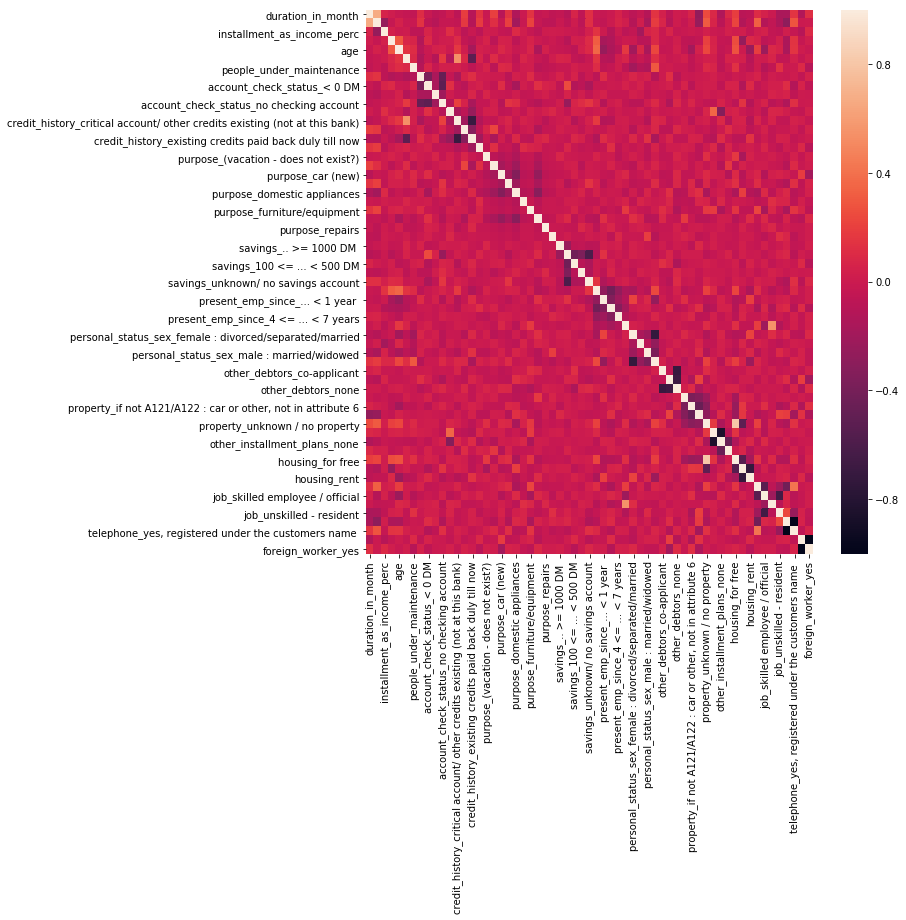

In [11]:
plt.figure(figsize=(10, 10))
# sns.heatmap(corr_matrix, annot=True)
sns.heatmap(corr_matrix)

__Unable to extract needed data from the heatmap hence using dataframe to arrange and sort by correlation values__

In [12]:
corr_matrix = pd.DataFrame(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack(), columns=['Correlation'])

corr_matrix.sort_values('Correlation', ascending=False)

,,Correlation
property_unknown / no property,housing_for free,0.808156
duration_in_month,credit_amount,0.669686
present_emp_since_unemployed,job_unemployed/ unskilled - non-resident,0.550908
credits_this_bank,credit_history_critical account/ other credits existing (not at this bank),0.540030
job_management/ self-employed/ highly qualified employee/ officer,"telephone_yes, registered under the customers name",0.414907
credit_history_all credits at this bank paid back duly,other_installment_plans_bank,0.353811
age,present_emp_since_.. >= 7 years,0.352581
credit_amount,job_management/ self-employed/ highly qualified employee/ officer,0.334242
present_res_since,present_emp_since_.. >= 7 years,0.319913
credit_amount,property_unknown / no property,0.307632


* Negative values imply negative correlation between the fields
* Negative correlation is mostly caused by the fields whose dummy values are obtained

### Drop the original variables which are converted to dummy

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [13]:
test_size = 0.3
seed = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=2, n_estimators=500, criterion="entropy", random_state=9999)

In [15]:
model = model.fit(X_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [16]:
y_pred = model.predict(X_test)
print(f'The accuracy of our model on test data is {model.score(X_test, y_test)}')

The accuracy of our model on test data is 0.64


In [17]:
conf_matrix = pd.DataFrame(metrics.confusion_matrix(y_pred, y_test), columns=['Actual No', 'Actual Yes'], index=['Predicted No', 'Predicted Yes'])
# metrics.confusion_matrix(y_pred, y_test)
conf_matrix

,Actual No,Actual Yes
Predicted No,85,48
Predicted Yes,6,11


__Analyzing the confusion matrix of our model's performance on the test data__
1. True Negative: 96 out of 129 defaulters were predicted correctly
2. True Positive: 14 out of 21 non defaulters were predicted correctly 
3. False Positive (T1 error): 7 out of 21 were identified as defaulters when they are actually non defaulters
4. False Negative (T2 error): 33 out of 129 defaulters were wrongly predicted as non defaulters

### Q6 Show the list of the features importance( 1 Marks)

In [18]:
pd.DataFrame(model.feature_importances_, columns=["Importance"], index=X_train.columns).sort_values(by='Importance', ascending=False)

,Importance
credit_amount,0.104147
duration_in_month,0.089002
age,0.075717
account_check_status_no checking account,0.048222
installment_as_income_perc,0.038114
present_res_since,0.033879
account_check_status_< 0 DM,0.026548
savings_... < 100 DM,0.020031
credit_history_critical account/ other credits existing (not at this bank),0.019082
purpose_(vacation - does not exist?),0.019065


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [20]:
# Use below values
num_folds = 10
seed = 77

In [21]:
#Validate the Random Forest model build above using k fold
folds = KFold(n_splits=num_folds, random_state=seed)

In [22]:
cv_model = RandomForestClassifier(n_jobs=2, n_estimators=500, criterion="entropy", random_state=9999)

In [23]:
scores = cross_val_score(cv_model, X, y, cv=folds)

scores

array([0.7 , 0.84, 0.72, 0.74, 0.68, 0.78, 0.68, 0.76, 0.78, 0.74])

In [24]:
#Calculate Mean score
print('The mean score:', scores.mean())

The mean score: 0.7420000000000001


In [25]:
# Calculate score standard deviation using std()
print('The standard deviation of all the scores :', scores.std())

The standard deviation of all the scores : 0.04770744176750624


# Q8 Print the confusion matrix( 1 Marks)

In [26]:
conf_matrix

,Actual No,Actual Yes
Predicted No,85,48
Predicted Yes,6,11


In [27]:
from sklearn.model_selection import cross_val_predict

cv_y_pred = cross_val_predict(cv_model, X, y, cv=folds)
cv_conf_matrix = pd.DataFrame(metrics.confusion_matrix(cv_y_pred, y), columns=['Actual No', 'Actual Yes'], index=['Predicted No', 'Predicted Yes'])

cv_conf_matrix

,Actual No,Actual Yes
Predicted No,312,98
Predicted Yes,31,59


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [28]:
print(f'The Recall or TPR Score : {metrics.recall_score(y_test, y_pred)}')
print(f'The Precision Score     : {metrics.precision_score(y_test, y_pred)}')
print(f'The F1 Score            : {metrics.f1_score(y_test, y_pred)}')

The Recall or TPR Score :  0.1864406779661017
The Precision Score     :  0.6470588235294118
The F1 Score            :  0.2894736842105263


In [29]:
print(f'The Recall or TPR Score : {metrics.recall_score(y, cv_y_pred)}')
print(f'The Precision Score     : {metrics.precision_score(y, cv_y_pred)}')
print(f'The F1 Score            : {metrics.f1_score(y, cv_y_pred)}')

The Recall or TPR Score :  0.37579617834394907
The Precision Score     :  0.6555555555555556
The F1 Score            :  0.4777327935222672


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [30]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve, auc

In [31]:
y_predictProb = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
    
# Plotting the roc curve
roc_auc = auc(fpr, tpr)
roc_auc

0.7481840193704601

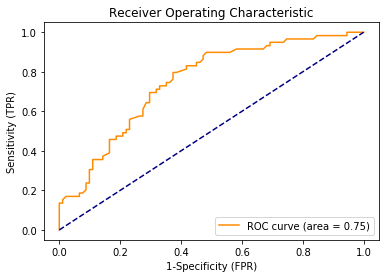

In [32]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [33]:
cv_y_predictProb = cross_val_predict(cv_model, X, y, cv=folds, method='predict_proba')
fpr, tpr, thresholds = roc_curve(y, cv_y_predictProb[::,1])
    
# Plotting the roc curve
roc_auc = auc(fpr, tpr)
roc_auc

0.7694100388107927

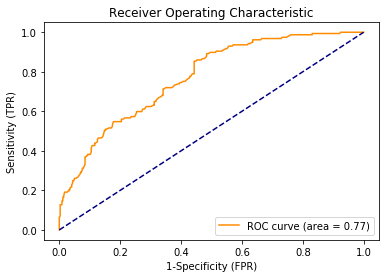

In [34]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [35]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [36]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    model.fit(X_, y_)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [37]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6473333333333333
Standard deviation:  0.016179548132682128
